# Sigrid Juselius 2022

In [81]:
'''

If SAVE_FILES set to True, the script will generate processed data files and plots.
False by default.

'''
SAVE_FILES = False


## Import packages and set data folders 

In [82]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import sys
import pickle as pkl

In [83]:
%pwd
%cd /Users/artemii/Documents/o-brain-lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON

/Users/artemii/Documents/o-brain-lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON


## Data Cleaning

In [84]:
meta_data = pd.read_csv("META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")
meta_data.head()

,Unnamed: 0,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Unnamed: 7,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",...,SKID_Diagnoses 1,SKID_Diagnoses 2,Comments_SKID_assessment,Hamilton_Scale,BSL23_sumscore,BSL23_behavior,AUDIT,Standard_Alcoholunits_Last_28days,Alcohol_Dependence_In_1st-3rd_Degree_relative,Relationship_Status
0,sub-032311,2,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,47,No,No
1,sub-032309,2,20-25,right,Gymnasium,negative,0.0,NaN,occasional smoker,2.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,45,Yes,Yes
2,sub-032382,2,25-30,right,Gymnasium,negative,0.0,NaN,occasional smoker,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,0.0,12,unknown,Yes
3,sub-032302,1,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,3.0,NaN,NaN,1.0,0,No,No
4,sub-032315,2,20-25,right,Gymnasium,negative,0.0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,2.0,NaN,NaN,7.0,22,No,No


In [85]:
anthropometry = pd.read_csv("Medical_LEMON/Anthropometry/Anthropometry_LEMON.csv")
anthropometry["BMI"] = anthropometry["Weight_kg"]/((anthropometry["Height_cm"]/100)**2)
anthropometry.describe()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI
count,228.000000,228.000000,227.000000,227.000000,228.000000
mean,174.759211,74.099079,84.362115,95.362996,24.232279
std,10.236729,13.054842,12.049521,9.958975,3.634442
min,145.000000,48.000000,60.000000,70.000000,17.930787
25%,167.425000,64.250000,75.800000,89.250000,21.545560
50%,175.000000,72.850000,83.000000,95.000000,23.664355
75%,182.825000,82.650000,92.000000,101.000000,26.076901
max,199.500000,113.900000,127.000000,126.000000,36.649262


<AxesSubplot:>

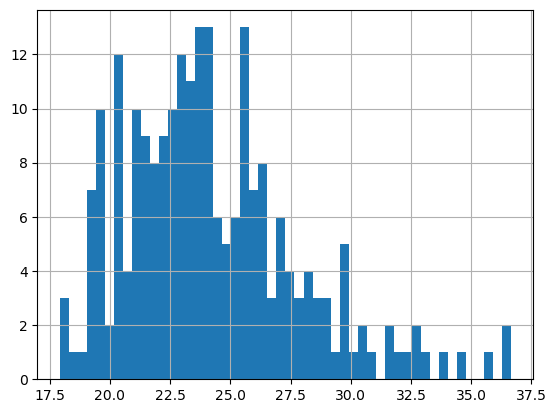

In [86]:
anthropometry["BMI"].hist(bins=50)

In [87]:
anthropometry

,Unnamed: 0,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI
0,sub-032301,162.0,78.00,97.0,111.0,29.721079
1,sub-032302,164.5,64.30,70.0,102.0,23.761791
2,sub-032303,166.5,101.60,113.0,123.0,36.649262
3,sub-032304,184.6,87.60,95.0,93.5,25.706368
4,sub-032305,171.5,71.19,83.0,107.0,24.204201
...,...,...,...,...,...,...
223,sub-032524,182.2,69.70,75.5,98.0,20.995974
224,sub-032525,175.8,72.50,75.6,85.0,23.458501
225,sub-032526,186.2,90.40,93.0,107.0,26.074085
226,sub-032527,192.1,87.40,84.0,91.0,23.684090


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [89]:
cognitive_tests_path = "Cognitive_Test_Battery_LEMON"
emotion_personality_tests_path = "Emotion_and_Personality_Test_Battery_LEMON"
cognitive_tests_folders = os.listdir(cognitive_tests_path)
for i in cognitive_tests_folders:
    if i == '.DS_Store':
        cognitive_tests_folders.remove(i)
cognitive_tests_path_full = [os.path.join(cognitive_tests_path, s) for s in cognitive_tests_folders]
tests_path_full = cognitive_tests_path_full + [emotion_personality_tests_path]
df_list = []
for folder in tests_path_full:
    for file in os.listdir(folder):
        if '.' in file:
            if file.split('.')[1] == 'csv':
                filepath = os.path.join(folder, file)
                df_list.append(pd.read_csv(filepath))

data = anthropometry
data = data.rename(columns={'Unnamed: 0':'id'}).set_index('id')
count = 0
for dataset in df_list:
    dataset = dataset.rename(columns={'Unnamed: 0':'id'})
    data = data.join(dataset.set_index('id'))
    count += 1

In [90]:
data.head()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_3,TAP_WM_4,TAP_WM_5,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
id,,,,,,,,,,,,,,,,,,,,,
sub-032301,162.0,78.00,97.0,111.0,29.721079,575.0,436.0,93,219.0,46,...,4.0,2.0,6.0,4.0,7.0,6.0,3.0,4.0,2.0,7.0
sub-032302,164.5,64.30,70.0,102.0,23.761791,705.0,678.0,18,279.0,18,...,3.0,5.0,6.0,3.0,7.0,6.0,4.0,4.0,5.0,6.0
sub-032303,166.5,101.60,113.0,123.0,36.649262,450.0,424.0,95,122.0,88,...,2.0,2.0,8.0,7.0,8.0,5.0,6.0,3.0,4.0,7.0
sub-032304,184.6,87.60,95.0,93.5,25.706368,847.0,781.0,10,209.0,34,...,3.0,2.0,7.0,6.0,7.0,7.0,5.0,3.0,6.0,7.0
sub-032305,171.5,71.19,83.0,107.0,24.204201,461.0,405.0,90,126.0,73,...,4.0,2.0,5.0,5.0,6.0,4.0,4.0,2.0,2.0,7.0


In [91]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 262 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    Height_cm                      float64
 1    Weight_kg                      float64
 2    Waist_cm                       float64
 3    Hip_cm                         float64
 4    BMI                            float64
 5    TAP_WM_1                       float64
 6    TAP_WM_2                       float64
 7    TAP_WM_3                       object 
 8    TAP_WM_4                       float64
 9    TAP_WM_5                       object 
 10   TAP_WM_6                       int64  
 11   TAP_WM_7                       int64  
 12   TAP_WM_8                       object 
 13   TAP_WM_9                       int64  
 14   TAP_WM_10                      object 
 15   TAP_WM_11                      int64  
 16   TAP_WM_12                      object 
 17   TAP_A_1               

In [92]:
data._get_numeric_data().info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 219 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Height_cm                      228 non-null    float64
 1    Weight_kg                      228 non-null    float64
 2    Waist_cm                       227 non-null    float64
 3    Hip_cm                         227 non-null    float64
 4    BMI                            228 non-null    float64
 5    TAP_WM_1                       227 non-null    float64
 6    TAP_WM_2                       227 non-null    float64
 7    TAP_WM_4                       227 non-null    float64
 8    TAP_WM_6                       228 non-null    int64  
 9    TAP_WM_7                       228 non-null    int64  
 10   TAP_WM_9                       228 non-null    int64  
 11   TAP_WM_11                      228 non-null    int64  
 12   TAP_A_1                

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_45456/493814805.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [93]:
data_num = data._get_numeric_data()

In [94]:
[data.shape, data_num.shape]

[(228, 262), (228, 219)]

In [95]:
# Replace NAs with medians

for col in data_num.columns:
    median = data_num[col].median()
    data_num[col].fillna(median, inplace=True)

data_num.shape

(228, 219)

In [96]:
data_num.describe()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,174.759211,74.099079,84.356140,95.361404,24.232279,581.79386,547.346491,181.100877,13.070175,2.157895,...,4.048246,2.710526,5.486842,4.263158,6.197368,5.456140,4.565789,2.723684,3.078947,5.701754
std,10.236729,13.054842,12.023289,9.937044,3.634442,156.25089,154.677006,88.119629,2.475321,3.025818,...,1.534435,1.158943,1.708956,1.314458,1.198601,1.493837,1.487115,1.339985,1.206770,1.303535
min,145.000000,48.000000,60.000000,70.000000,17.930787,92.00000,315.000000,21.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,167.425000,64.250000,75.900000,89.375000,21.545560,471.00000,435.500000,121.000000,12.000000,0.000000,...,3.000000,2.000000,4.000000,3.000000,5.750000,4.000000,4.000000,2.000000,2.000000,5.000000
50%,175.000000,72.850000,83.000000,95.000000,23.664355,557.00000,524.000000,163.000000,14.000000,1.000000,...,4.000000,2.000000,6.000000,4.000000,6.000000,6.000000,4.000000,2.000000,3.000000,6.000000
75%,182.825000,82.650000,92.000000,101.000000,26.076901,673.50000,627.250000,225.250000,15.000000,3.000000,...,5.000000,3.000000,7.000000,5.000000,7.000000,6.000000,5.250000,3.000000,4.000000,7.000000
max,199.500000,113.900000,127.000000,126.000000,36.649262,1244.00000,1229.000000,491.000000,15.000000,15.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


## Principal Component Analysis

#### TODO What's that?

### Scale data for PCA

In [97]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(data_num)

X.shape

/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:981: RuntimeWarning:

invalid value encountered in divide

/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning:

invalid value encountered in divide

/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning:

invalid value encountered in divide



(228, 219)

In [98]:
data_num_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

### Remove null and non-number values

In [99]:
data_num_tr.describe()

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,...,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02
mean,2.039304e-15,6.710032e-16,-3.145632e-16,-1.296660e-15,-3.817609e-16,-3.057983e-16,2.573477e-16,-1.283619e-16,-8.667531e-17,-4.674623e-17,...,2.964247e-16,-2.950856e-16,1.636118e-16,-3.691005e-16,-2.208273e-16,2.198534e-16,-2.848599e-17,-6.817159e-17,-1.821155e-16,-3.135893e-16
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,...,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00
min,-2.913498e+00,-2.003586e+00,-2.030204e+00,-2.557823e+00,-1.737641e+00,-3.141560e+00,-1.505445e+00,-1.820856e+00,-5.291812e+00,-7.147298e-01,...,-1.337790e+00,-6.144303e-01,-2.044824e+00,-1.725531e+00,-3.509594e+00,-2.318690e+00,-1.729143e+00,-5.412571e-01,-8.960456e-01,-2.846029e+00
25%,-7.180367e-01,-7.560987e-01,-7.048609e-01,-6.037585e-01,-7.408649e-01,-7.106368e-01,-7.246881e-01,-6.835380e-01,-4.332893e-01,-7.147298e-01,...,-6.846508e-01,-6.144303e-01,-8.719437e-01,-9.630868e-01,-3.740633e-01,-9.769101e-01,-3.812982e-01,-5.412571e-01,-8.960456e-01,-5.395316e-01
50%,2.357386e-02,-9.588988e-02,-1.130410e-01,-3.644934e-02,-1.566056e-01,-1.590289e-01,-1.512691e-01,-2.058645e-01,3.764645e-01,-3.835136e-01,...,-3.151112e-02,-6.144303e-01,3.009363e-01,-2.006431e-01,-1.650279e-01,3.648700e-01,-3.812982e-01,-5.412571e-01,-6.556431e-02,2.293009e-01
75%,7.896601e-01,6.564411e-01,6.371533e-01,5.686804e-01,5.086559e-01,5.882073e-01,5.177196e-01,5.021158e-01,7.813414e-01,2.789190e-01,...,6.216285e-01,2.503235e-01,8.873763e-01,5.618006e-01,6.711135e-01,3.648700e-01,4.611048e-01,2.066618e-01,7.649169e-01,9.981334e-01
max,2.422182e+00,3.055456e+00,3.554575e+00,3.090055e+00,3.423992e+00,4.247420e+00,4.416644e+00,3.524538e+00,7.813414e-01,4.253514e+00,...,2.581047e+00,4.574092e+00,1.473816e+00,2.849132e+00,1.507255e+00,1.706650e+00,2.314391e+00,3.946257e+00,4.086842e+00,1.766966e+00


In [100]:
data_num_tr.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 219 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Height_cm                      228 non-null    float64
 1    Weight_kg                      228 non-null    float64
 2    Waist_cm                       228 non-null    float64
 3    Hip_cm                         228 non-null    float64
 4    BMI                            228 non-null    float64
 5    TAP_WM_1                       228 non-null    float64
 6    TAP_WM_2                       228 non-null    float64
 7    TAP_WM_4                       228 non-null    float64
 8    TAP_WM_6                       228 non-null    float64
 9    TAP_WM_7                       228 non-null    float64
 10   TAP_WM_9                       228 non-null    float64
 11   TAP_WM_11                      228 non-null    float64
 12   TAP_A_1                

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_45456/290913772.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [101]:
data_num_tr.drop(columns=['YFAS_control', 'YFAS_attempts', 'YFAS_time',
                         'YFAS_activities', 'YFAS_problems', 'YFAS_tolerance',
                         'YFAS_withdrawal', 'YFAS_impairment', 'YFAS_symptom_count',
                         'YFAS_diagnosis', 'Unnamed: 32'], inplace=True)

In [102]:
data_num_tr.info(verbose=True, null_counts=True)

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_45456/290913772.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, sub-032301 to sub-032528
Data columns (total 208 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Height_cm                      228 non-null    float64
 1    Weight_kg                      228 non-null    float64
 2    Waist_cm                       228 non-null    float64
 3    Hip_cm                         228 non-null    float64
 4    BMI                            228 non-null    float64
 5    TAP_WM_1                       228 non-null    float64
 6    TAP_WM_2                       228 non-null    float64
 7    TAP_WM_4                       228 non-null    float64
 8    TAP_WM_6                       228 non-null    float64
 9    TAP_WM_7                       228 non-null    float64
 10   TAP_WM_9                       228 non-null    float64
 11   TAP_WM_11                      228 non-null    float64
 12   TAP_A_1                

In [103]:
# Had to install plotly through conda as it didn't work through pip

# !conda install --yes --prefix {'/opt/homebrew/opt/python@3.9/Frameworks/Python.framework/Versions/3.9'} plotly



In [104]:
sys.prefix

'/Users/artemii/opt/anaconda3/envs/juselius22'

### Reduce and Plot

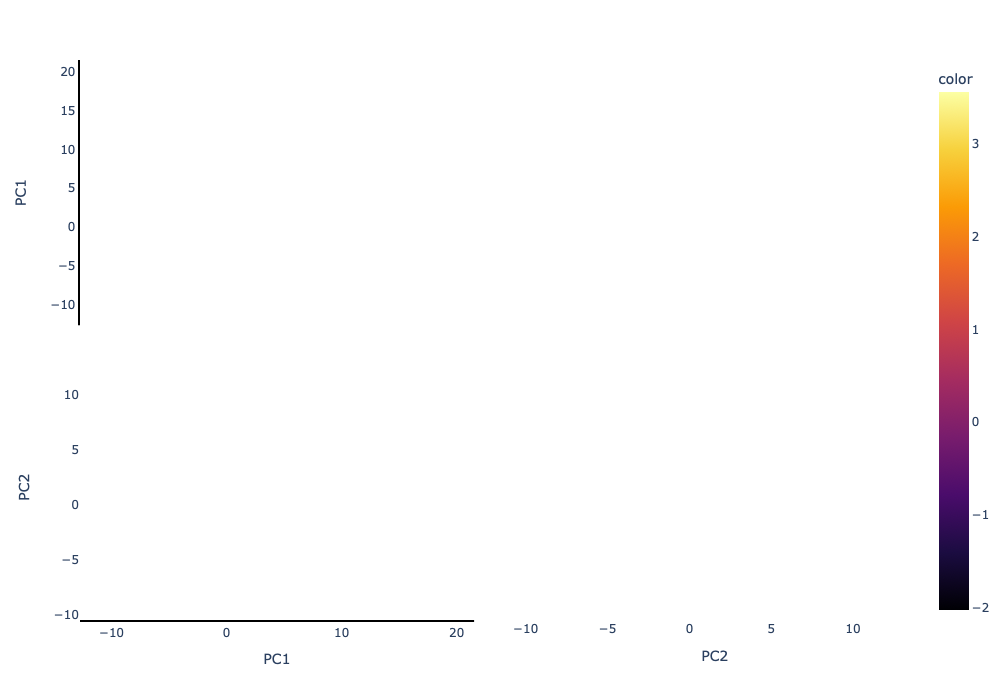

In [105]:
pca = PCA(n_components=2)
components = pca.fit_transform(data_num_tr)
fig = px.scatter_matrix(components,
                        dimensions=range(2),
                        color=data_num_tr['Waist_cm'],
                        color_continuous_scale=px.colors.sequential.Inferno,
                        width=1200,
                        height=700,
                        labels={'0': 'PC1', '1': 'PC2'}
                       )

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

In [106]:
dir(px.colors.sequential)

['Aggrnyl',
 'Aggrnyl_r',
 'Agsunset',
 'Agsunset_r',
 'Blackbody',
 'Blackbody_r',
 'Bluered',
 'Bluered_r',
 'Blues',
 'Blues_r',
 'Blugrn',
 'Blugrn_r',
 'Bluyl',
 'Bluyl_r',
 'Brwnyl',
 'Brwnyl_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'Burg',
 'Burg_r',
 'Burgyl',
 'Burgyl_r',
 'Cividis',
 'Cividis_r',
 'Darkmint',
 'Darkmint_r',
 'Electric',
 'Electric_r',
 'Emrld',
 'Emrld_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'Hot',
 'Hot_r',
 'Inferno',
 'Inferno_r',
 'Jet',
 'Jet_r',
 'Magenta',
 'Magenta_r',
 'Magma',
 'Magma_r',
 'Mint',
 'Mint_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'Oryel',
 'Oryel_r',
 'Peach',
 'Peach_r',
 'Pinkyl',
 'Pinkyl_r',
 'Plasma',
 'Plasma_r',
 'Plotly3',
 'Plotly3_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuRd',
 'PuRd_r',
 'Purp',
 'Purp_r',
 'Purples',
 'Purples_r',
 'Purpor',
 'Purpor_r',
 'Rainbow',
 'Rainbow_r',
 'RdBu',
 'RdBu_r',
 'RdPu',
 'RdPu_r',
 'Redor',
 'Redor_r',
 'Reds',
 'Reds_r',
 'Sunset

In [107]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [108]:
import plotly.io as pio
pio.kaleido.scope.default_width = 1200
pio.kaleido.scope.default_height = 700

if SAVE_FILES:
    os.makedirs("plots", exist_ok=True)
    fig.write_image('plots/mind-brain-body-pca-waist.svg')

In [109]:
pca.n_features_

208

In [110]:
pca.explained_variance_ratio_

array([0.10391384, 0.07820958])

### Important Features

In [111]:
relevant_features = pd.DataFrame(abs(pca.components_), columns=data_num_tr.columns, index=['PC1', 'PC2'])

In [112]:
relevant_features

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
PC1,0.038197,0.055684,0.116067,0.084461,0.095691,0.084276,0.079459,0.052429,0.084912,0.078688,...,0.056584,0.081163,0.032193,0.042016,0.029650,0.002727,0.055478,0.031825,0.018574,0.020990
PC2,0.040193,0.010423,0.042846,0.035892,0.019110,0.042615,0.037246,0.032523,0.068943,0.069808,...,0.057363,0.045395,0.080174,0.002728,0.060571,0.018179,0.072679,0.033523,0.087421,0.083787


In [113]:
relevant_features.idxmax(axis=1)

PC1           TAP_I_8
PC2    TeiQueSF_total
dtype: object

In [114]:
relevant_features_pc1_sorted = relevant_features.transpose().sort_values('PC1', ascending=False)
relevant_features_pc1_sorted.head(20)

,PC1,PC2
TAP_I_8,0.138931,0.083439
TAP_I_9,0.138299,0.079749
TAP_A_5,0.136630,0.060197
TMT_6,0.135815,0.096694
TAP_I_15,0.135355,0.066235
TAP_A_6,0.134241,0.060816
TAP_I_16,0.133451,0.067200
TAP_A_10,0.133281,0.057977
TAP_A_11,0.129601,0.056234
TAP_A_2,0.127693,0.052220


In [115]:
relevant_features_pc2_sorted = relevant_features.transpose().sort_values('PC2', ascending=False)
relevant_features_pc2_sorted.head(20)

,PC1,PC2
TeiQueSF_total,0.063009,0.196122
TeiQueSF_well_being,0.044867,0.178614
FSoZu_SI,0.065341,0.158022
STAI_Trait_Anxiety,0.124360,0.149617
FSoZu_EU,0.031809,0.147954
TeiQueSF_sociability,0.014632,0.144115
MSPSS_total,0.046925,0.142064
NEOFFI_Extraversion,0.038579,0.141898
NEOFFI_Neuroticism,0.111476,0.140867
LOT_sumscore,0.076698,0.140325


In [116]:
if SAVE_FILES:
    os.makedirs("processed_data", exist_ok=True)
    relevant_features_pc1_sorted.to_csv('processed_data/relevant_features_pc1_sorted.csv')
    relevant_features_pc2_sorted.to_csv('processed_data/relevant_features_pc2_sorted.csv')

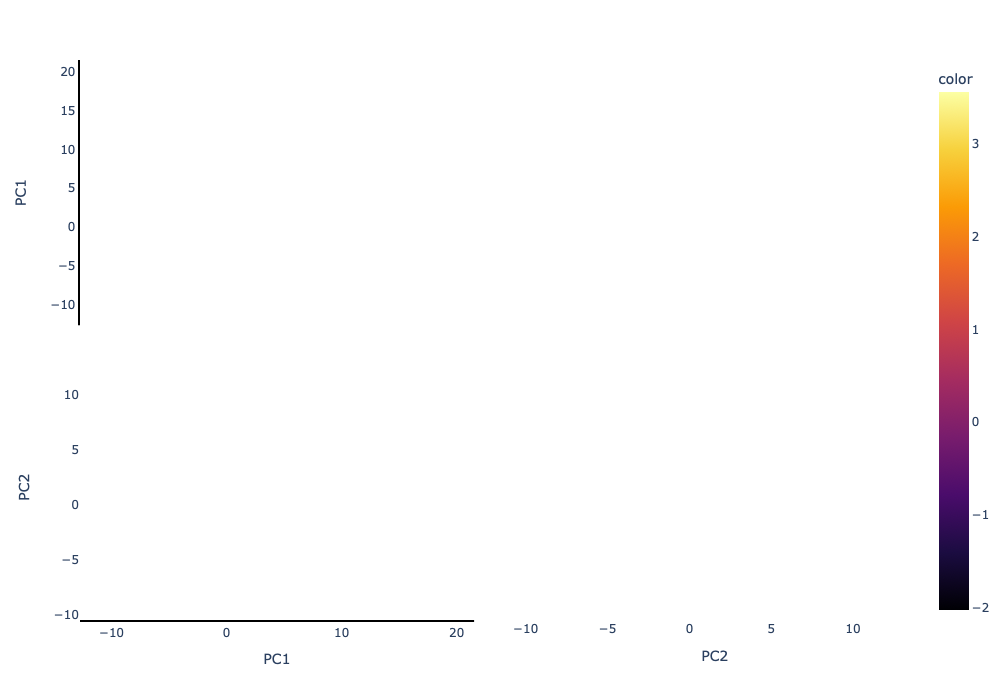

In [117]:
fig

In [118]:
sys.version

'3.10.6 (main, Oct 24 2022, 11:04:34) [Clang 12.0.0 ]'

In [119]:
%cd /Users/artemii/Documents/o-brain-lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts/
DATA_FOLDER = '/Users/artemii/Documents/o-brain-lab/projects/obesity-types/datasets/mind-brain-body/Behavioural_Data_MPILMBB_LEMON'

/Users/artemii/Documents/o-brain-lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts


### PCA to explain 95% variance

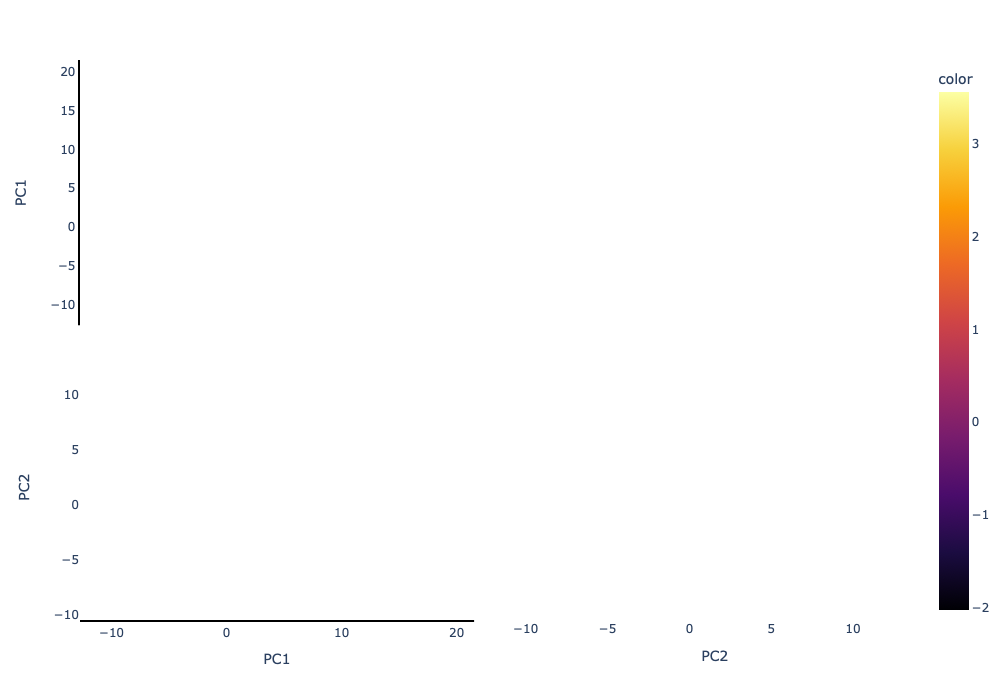

In [120]:
pca95 = PCA(n_components=0.95)

components95 = pca95.fit_transform(data_num_tr)
fig = px.scatter_matrix(components95[:,:2],
                        dimensions=range(2),
                        color=data_num_tr['Waist_cm'],
                        color_continuous_scale=px.colors.sequential.Inferno,
                        width=1200,
                        height=700,
                        labels={'0': 'PC1', '1': 'PC2'}
                       )

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

In [121]:
pca95.explained_variance_ratio_

array([0.10391384, 0.07820958, 0.05498169, 0.03604744, 0.02835773,
       0.02663371, 0.02444283, 0.02390001, 0.02180026, 0.01973436,
       0.01933639, 0.01889981, 0.01716702, 0.01579865, 0.01510004,
       0.01451837, 0.01418504, 0.01342659, 0.0124672 , 0.01233099,
       0.01145415, 0.01104859, 0.01083156, 0.00997454, 0.00989472,
       0.00943095, 0.00927514, 0.00923346, 0.00890793, 0.00850939,
       0.00815875, 0.00809912, 0.00795661, 0.00761172, 0.00732202,
       0.00726093, 0.00711628, 0.00684913, 0.00666171, 0.00658454,
       0.00641178, 0.00619309, 0.00612437, 0.00595646, 0.00588934,
       0.00569145, 0.00561944, 0.00548086, 0.00536788, 0.00523831,
       0.00519215, 0.00496439, 0.00494601, 0.00477857, 0.00470402,
       0.00458278, 0.00448565, 0.00429983, 0.00416137, 0.0041412 ,
       0.00404902, 0.00397685, 0.00388857, 0.0037608 , 0.00369242,
       0.00367851, 0.00356071, 0.00347497, 0.00334403, 0.00330451,
       0.0032367 , 0.0030816 , 0.00303749, 0.00301263, 0.00292

In [122]:
print("Number of dimensions needed to explain 95% of variance is " + str(len(pca95.explained_variance_ratio_)))

Number of dimensions needed to explain 95% of variance is 98


### PCA with no BMI

In [205]:
data_num_tr_nobmi = data_num_tr.copy()
data_num_tr_nobmi = data_num_tr_nobmi.drop(['BMI', 'Waist_cm', 'Height_cm', 'Weight_kg', 'Hip_cm'], axis=1)

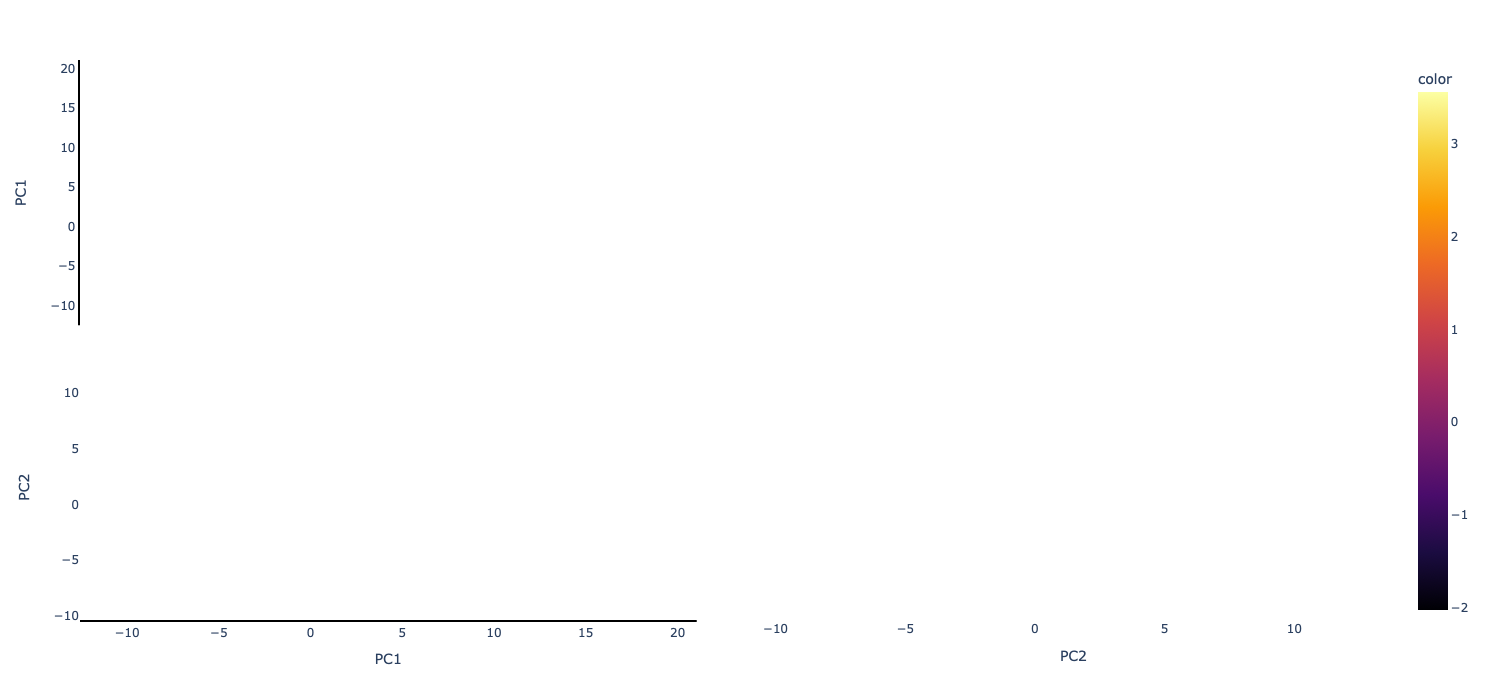

In [206]:
pca_nobmi = PCA(n_components=2)
components_nobmi = pca_nobmi.fit_transform(data_num_tr_nobmi)
fig = px.scatter_matrix(components_nobmi,
                        dimensions=range(2),
                        color=data_num_tr['Waist_cm'],
                        color_continuous_scale=px.colors.sequential.Inferno,
                        width=1200,
                        height=700,
                        labels={'0': 'PC1', '1': 'PC2'}
                       )

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

fig.show()

## Clustering using Bayesian Gaussian Mixture Model

In [125]:
# Clustering using Bayesian Gaussian Mixture Model

from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10,
                              n_init=10,
                              covariance_type="full",
                              weight_concentration_prior=10,
                              init_params="k-means++")

In [126]:
bgm.fit(data_num_tr)
np.round(bgm.weights_, 2)

array([0.06, 0.15, 0.06, 0.13, 0.09, 0.12, 0.09, 0.17, 0.01, 0.12])

In [127]:
bgm.converged_

True

In [128]:
dir(bgm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_initial_parameters',
 '_check_means_parameters',
 '_check_n_features',
 '_check_parameters',
 '_check_precision_parameters',
 '_check_weights_parameters',
 '_checkcovariance_prior_parameter',
 '_compute_lower_bound',
 '_e_step',
 '_estimate_log_prob',
 '_estimate_log_prob_resp',
 '_estimate_log_weights',
 '_estimate_means',
 '_estimate_precisions',
 '_estimate_weighted_log_prob',
 '_estimate_weights',
 '_estimate_wishart_diag',
 '_estimate_wishart_full',
 '_estimate_wishart_spherical',
 '_estimate_wishart_tied',
 '_est

In [129]:
bgm_cluster = bgm.predict(data_num_tr)

In [130]:
bgm_cluster

array([3, 1, 1, 9, 9, 9, 1, 1, 4, 5, 7, 4, 7, 7, 6, 6, 1, 3, 9, 1, 7, 7,
       1, 7, 3, 2, 3, 7, 5, 9, 5, 1, 1, 7, 7, 3, 4, 6, 7, 7, 7, 0, 9, 9,
       3, 3, 4, 1, 3, 1, 2, 5, 2, 6, 4, 5, 3, 3, 3, 2, 5, 2, 1, 6, 7, 9,
       4, 5, 3, 7, 6, 1, 5, 9, 6, 4, 0, 6, 1, 0, 6, 2, 6, 9, 0, 3, 6, 9,
       1, 7, 4, 7, 9, 1, 1, 5, 2, 5, 2, 9, 9, 5, 1, 7, 7, 7, 4, 3, 9, 7,
       4, 9, 9, 0, 6, 6, 3, 9, 7, 7, 6, 5, 5, 1, 1, 2, 1, 7, 1, 3, 9, 6,
       4, 7, 8, 5, 7, 7, 1, 3, 5, 0, 1, 5, 9, 2, 0, 7, 9, 1, 9, 6, 1, 5,
       1, 5, 3, 5, 7, 1, 5, 0, 3, 5, 5, 4, 1, 1, 6, 7, 5, 7, 4, 7, 9, 3,
       0, 3, 4, 4, 4, 6, 2, 0, 9, 4, 5, 3, 1, 3, 5, 5, 0, 7, 5, 4, 1, 2,
       9, 9, 0, 9, 1, 3, 9, 3, 7, 4, 7, 4, 1, 3, 9, 9, 4, 7, 7, 7, 6, 7,
       7, 3, 3, 3, 6, 5, 2, 7])

### Create composite data frame

In [131]:
data_bgm_clustered = data_num.copy()
data_bgm_clustered['bgm_cluster'] = bgm_cluster
data_bgm_clustered

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping,bgm_cluster
id,,,,,,,,,,,,,,,,,,,,,
sub-032301,162.0,78.00,97.0,111.0,29.721079,575.0,436.0,219.0,11,3,...,2.0,6.0,4.0,7.0,6.0,3.0,4.0,2.0,7.0,3
sub-032302,164.5,64.30,70.0,102.0,23.761791,705.0,678.0,279.0,14,3,...,5.0,6.0,3.0,7.0,6.0,4.0,4.0,5.0,6.0,1
sub-032303,166.5,101.60,113.0,123.0,36.649262,450.0,424.0,122.0,14,1,...,2.0,8.0,7.0,8.0,5.0,6.0,3.0,4.0,7.0,1
sub-032304,184.6,87.60,95.0,93.5,25.706368,847.0,781.0,209.0,12,11,...,2.0,7.0,6.0,7.0,7.0,5.0,3.0,6.0,7.0,9
sub-032305,171.5,71.19,83.0,107.0,24.204201,461.0,405.0,126.0,15,2,...,2.0,5.0,5.0,6.0,4.0,4.0,2.0,2.0,7.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-032524,182.2,69.70,75.5,98.0,20.995974,528.0,532.0,151.0,15,2,...,2.0,6.0,4.0,6.0,6.0,6.0,2.0,2.0,4.0,3
sub-032525,175.8,72.50,75.6,85.0,23.458501,585.0,547.0,127.0,15,1,...,2.0,4.0,3.0,7.0,6.0,7.0,2.0,3.0,5.0,6
sub-032526,186.2,90.40,93.0,107.0,26.074085,564.0,553.0,177.0,10,3,...,4.0,4.0,2.0,3.0,5.0,3.0,2.0,2.0,4.0,5


In [132]:
data_bgm_clustered.groupby('bgm_cluster', as_index=False)['BMI', 'Waist_cm'].agg('median')

/var/folders/bf/gw7g3vwn4cl_k752qcmmxhdh0000gn/T/ipykernel_45456/844293700.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,bgm_cluster,BMI,Waist_cm
0,0,23.243610,83.50
1,1,23.884081,84.75
2,2,22.951595,84.00
3,3,23.468269,83.00
4,4,25.107953,89.00
5,5,24.025075,82.50
6,6,22.943702,78.00
7,7,23.675277,80.50
8,8,27.526237,93.00
9,9,24.218091,83.50


### Interpret BGM clusters using logistic regression

In [133]:
from sklearn.linear_model import LogisticRegression
lin_reg = LogisticRegression()
lin_reg.fit(data_num_tr, bgm_cluster)

/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [134]:
import math
prob_array = pow(math.e, lin_reg.coef_)
np.shape(prob_array)

(10, 208)

In [135]:
highest_weight_clusters = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])[np.round(bgm.weights_, 2) >= 0.1]
highest_weight_clusters = list(highest_weight_clusters)

logreg_coef_df = pd.DataFrame(prob_array, columns = data_num_tr.columns)

max_coef_features = list(logreg_coef_df.idxmax(axis=1))
min_coef_features = list(logreg_coef_df.idxmin(axis=1))

In [136]:
feature_coef_by_cluster_max = data_bgm_clustered.groupby('bgm_cluster', as_index=False)[max_coef_features + ['BMI']].agg('median')

In [137]:
feature_coef_by_cluster_min = data_bgm_clustered.groupby('bgm_cluster', as_index=False)[min_coef_features + ['BMI']].agg('median')

In [138]:
# Clusters with highest weights 1, 3, 6, 8, 9

In [139]:
feature_coef_by_cluster_max.iloc[highest_weight_clusters, :]

,bgm_cluster,NYC-Q_lemon_28,TAP_I_6,NYC-Q_lemon_9,CVLT_1,TAP_I_26,CVLT_7,RWT_19,NYC-Q_lemon_18,ERQ_suppression,COPE_Acceptance,BMI
1,1,3.5,1.0,1.0,1.0,3.717,57.5,0.0,2.0,3.75,5.5,23.884081
3,3,3.0,0.0,1.0,1.0,4.801,57.5,0.0,2.0,4.00,6.0,23.468269
5,5,2.5,0.0,1.0,1.0,2.179,57.5,0.0,2.0,3.50,5.5,24.025075
7,7,3.0,0.0,1.0,1.0,5.975,57.5,0.0,3.5,4.00,6.0,23.675277
9,9,4.0,0.0,1.0,1.0,3.492,57.5,0.0,1.0,3.75,6.0,24.218091


In [140]:
feature_coef_by_cluster_min.iloc[highest_weight_clusters, :]

,bgm_cluster,NYC-Q_lemon_18,COPE_BehavioralDisengagement,FSoZu_PU,RWT_5,NYC-Q_lemon_22,UPPS_urgency,CERQ_positiveRefocusing,TAP_I_27,CVLT_7,NYC-Q_lemon_28,BMI
1,1,2.0,2.5,4.8,8.5,2.0,27.0,5.0,60.0,57.5,3.5,23.884081
3,3,2.0,3.0,4.6,7.0,1.0,25.0,5.0,50.0,57.5,3.0,23.468269
5,5,2.0,3.0,4.8,10.0,1.5,25.0,4.0,69.5,57.5,2.5,24.025075
7,7,3.5,3.0,4.6,10.0,1.0,26.5,4.5,48.0,57.5,3.0,23.675277
9,9,1.0,3.0,4.6,8.5,1.0,25.0,5.0,64.0,57.5,4.0,24.218091


In [141]:
pd.Series(max_coef_features)

0     NYC-Q_lemon_28
1            TAP_I_6
2      NYC-Q_lemon_9
3             CVLT_1
4           TAP_I_26
5             CVLT_7
6             RWT_19
7     NYC-Q_lemon_18
8    ERQ_suppression
9    COPE_Acceptance
dtype: object

In [142]:
type(min_coef_features)

list

In [143]:
feature_coef_by_cluster_max

,bgm_cluster,NYC-Q_lemon_28,TAP_I_6,NYC-Q_lemon_9,CVLT_1,TAP_I_26,CVLT_7,RWT_19,NYC-Q_lemon_18,ERQ_suppression,COPE_Acceptance,BMI
0,0,6.5,1.0,1.0,1.0,3.1525,57.5,0.0,1.0,3.625,6.0,23.243610
1,1,3.5,1.0,1.0,1.0,3.7170,57.5,0.0,2.0,3.750,5.5,23.884081
2,2,6.0,1.0,1.0,1.0,2.3460,56.0,0.0,1.0,3.500,6.0,22.951595
3,3,3.0,0.0,1.0,1.0,4.8010,57.5,0.0,2.0,4.000,6.0,23.468269
4,4,5.0,0.0,1.0,1.0,9.1160,57.0,0.0,1.0,3.500,5.0,25.107953
5,5,2.5,0.0,1.0,1.0,2.1790,57.5,0.0,2.0,3.500,5.5,24.025075
6,6,3.0,0.5,1.0,1.0,1.6020,57.5,0.0,2.5,3.875,6.0,22.943702
7,7,3.0,0.0,1.0,1.0,5.9750,57.5,0.0,3.5,4.000,6.0,23.675277
8,8,6.0,1.0,2.0,1.0,0.0060,40.0,0.0,1.0,5.750,6.0,27.526237
9,9,4.0,0.0,1.0,1.0,3.4920,57.5,0.0,1.0,3.750,6.0,24.218091


In [144]:
if SAVE_FILES:
    feature_coef_by_cluster_max.to_csv("processed_data/feature_importance_max_logreg.csv")
    feature_coef_by_cluster_min.to_csv("processed_data/feature_importance_min_logreg.csv")

In [145]:
# Not overwriting files. Uncomment if needed
# os.makedirs("processed_data", exist_ok=True)
# data_bgm_clustered.to_csv("processed_data/clustered_behavioral_LEMON.csv")

In [146]:
pd.Series(min_coef_features)

0                  NYC-Q_lemon_18
1    COPE_BehavioralDisengagement
2                        FSoZu_PU
3                           RWT_5
4                  NYC-Q_lemon_22
5                    UPPS_urgency
6         CERQ_positiveRefocusing
7                        TAP_I_27
8                          CVLT_7
9                  NYC-Q_lemon_28
dtype: object

## Clustering based on PCA

### Plotting functions

In [147]:
# Plotting functions for BGM from HOML Book

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

### Model fitting

In [148]:
from sklearn.mixture import BayesianGaussianMixture

bgm_on_pca = BayesianGaussianMixture(n_components=10,
                                     n_init=20,
                                     covariance_type="full",
                                     weight_concentration_prior=10000,
                                     init_params="k-means++",
                                     random_state=44)

In [149]:
bgm_on_pca.fit(components)
bgm_on_pca.weights_

array([0.06971465, 0.23540592, 0.52353853, 0.00451122, 0.00451073,
       0.01017024, 0.00450975, 0.13862129, 0.00450938, 0.00450827])

In [150]:
len(components)

228

### Plot clusters

In [151]:
# Centroid coordinates
bgm_on_pca.means_

array([[-1.90320743e+00,  5.76103469e+00],
       [ 4.74880090e+00, -1.45900876e+00],
       [-2.91835258e+00, -1.13381739e+00],
       [ 3.44609526e-03, -2.46405056e-04],
       [ 3.44564268e-03, -2.46371774e-04],
       [ 8.73503591e+00,  4.25324141e+00],
       [ 3.44473769e-03, -2.46305223e-04],
       [ 3.27202117e+00,  3.54897724e+00],
       [ 3.45222474e-03, -2.46729411e-04],
       [ 3.44337777e-03, -2.46205219e-04]])

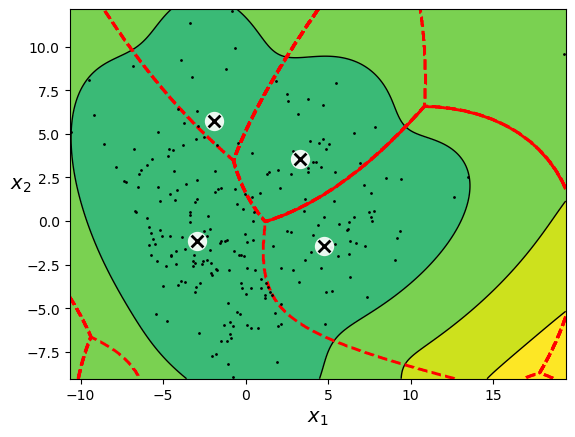

In [152]:
fig = plot_gaussian_mixture(bgm_on_pca, components)
# Clusters shown on plot are (clockwise): 2, 0, 7, 1
fig

In [153]:
if SAVE_FILES:
    os.makedirs("plots", exist_ok=True)
    fig.write_image('plots/mind-brain-body-pca-clusters.svg')

### Create composite data frame

In [154]:
bgm_cluster_on_pca = bgm_on_pca.predict(components)

data_bgm_clustered_on_pca = data_num.copy()
data_bgm_clustered_on_pca['bgm_pca_cluster'] = bgm_cluster_on_pca
data_bgm_clustered_on_pca

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping,bgm_pca_cluster
id,,,,,,,,,,,,,,,,,,,,,
sub-032301,162.0,78.00,97.0,111.0,29.721079,575.0,436.0,219.0,11,3,...,2.0,6.0,4.0,7.0,6.0,3.0,4.0,2.0,7.0,1
sub-032302,164.5,64.30,70.0,102.0,23.761791,705.0,678.0,279.0,14,3,...,5.0,6.0,3.0,7.0,6.0,4.0,4.0,5.0,6.0,2
sub-032303,166.5,101.60,113.0,123.0,36.649262,450.0,424.0,122.0,14,1,...,2.0,8.0,7.0,8.0,5.0,6.0,3.0,4.0,7.0,1
sub-032304,184.6,87.60,95.0,93.5,25.706368,847.0,781.0,209.0,12,11,...,2.0,7.0,6.0,7.0,7.0,5.0,3.0,6.0,7.0,7
sub-032305,171.5,71.19,83.0,107.0,24.204201,461.0,405.0,126.0,15,2,...,2.0,5.0,5.0,6.0,4.0,4.0,2.0,2.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-032524,182.2,69.70,75.5,98.0,20.995974,528.0,532.0,151.0,15,2,...,2.0,6.0,4.0,6.0,6.0,6.0,2.0,2.0,4.0,2
sub-032525,175.8,72.50,75.6,85.0,23.458501,585.0,547.0,127.0,15,1,...,2.0,4.0,3.0,7.0,6.0,7.0,2.0,3.0,5.0,2
sub-032526,186.2,90.40,93.0,107.0,26.074085,564.0,553.0,177.0,10,3,...,4.0,4.0,2.0,3.0,5.0,3.0,2.0,2.0,4.0,1


In [155]:
if SAVE_FILES:
    data_bgm_clustered_on_pca.to_csv("processed_data/clustered_behavioral_LEMON_pca_based.csv")

### Visualize clusters with color

#### TODO What to do with it?

### Interpret clusters using logistic regression

#### TODO LogReg does not converge

Try GLM?

In [157]:
from sklearn.linear_model import LogisticRegression
lin_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
lin_reg.fit(data_num_tr, bgm_cluster_on_pca)

/Users/artemii/opt/anaconda3/envs/juselius22/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=10, multi_class='multinomial')

In [158]:
data_num_tr

,Height_cm,Weight_kg,Waist_cm,Hip_cm,BMI,TAP_WM_1,TAP_WM_2,TAP_WM_4,TAP_WM_6,TAP_WM_7,...,COPE_Humor,COPE_Alkohol‎_Drogen,COPE_UseOfInstrumentalSupport,COPE_Venting,COPE_Planning,COPE_Acceptance,COPE_SelfBlame,COPE_Religion,COPE_Denial,COPE_activeCoping
id,,,,,,,,,,,,,,,,,,,,,
sub-032301,-1.249157,0.299468,1.053928,1.577230,1.513541,-0.043576,-0.721448,0.431033,-0.838166,0.278919,...,-0.031511,-0.614430,0.300936,-0.200643,0.671114,0.36487,-1.055221,0.954581,-0.896046,0.998133
sub-032302,-1.004401,-0.752260,-1.196655,0.669535,-0.129738,0.790250,0.846545,1.113424,0.376465,0.278919,...,-0.684651,1.979831,0.300936,-0.963087,0.671114,0.36487,-0.381298,0.954581,1.595398,0.229301
sub-032303,-0.808596,2.111204,2.387606,2.787490,3.423992,-0.845332,-0.799200,-0.672165,0.376465,-0.383514,...,-1.337790,-0.614430,1.473816,2.086688,1.507255,-0.30602,0.966547,0.206662,0.764917,0.998133
sub-032304,0.963437,1.036445,0.887218,-0.187732,0.406481,1.701044,1.513913,0.317302,-0.433289,2.928649,...,-0.684651,-0.614430,0.887376,1.324244,0.671114,1.03576,0.292624,0.206662,2.425879,0.998133
sub-032305,-0.319084,-0.223326,-0.113041,1.173810,-0.007743,-0.774777,-0.922307,-0.626672,0.781341,-0.052297,...,-0.031511,-0.614430,-0.285504,0.561801,-0.165028,-0.97691,-0.381298,-0.541257,-0.896046,0.998133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-032524,0.728471,-0.337711,-0.738203,0.266116,-0.892414,-0.345036,-0.099435,-0.342343,0.781341,-0.052297,...,-0.031511,-0.614430,0.300936,-0.200643,-0.165028,0.36487,0.966547,-0.541257,-0.896046,-1.308364
sub-032525,0.101896,-0.122759,-0.729867,-1.044999,-0.213370,0.020564,-0.002245,-0.615299,0.781341,-0.383514,...,1.927908,-0.614430,-0.871944,-0.963087,0.671114,0.36487,1.640469,-0.541257,-0.065564,-0.539532
sub-032526,1.120081,1.251397,0.720508,1.173810,0.507879,-0.114131,0.036631,-0.046640,-1.243043,0.278919,...,-0.031511,1.115077,-0.871944,-1.725531,-2.673452,-0.30602,-1.055221,-0.541257,-0.896046,-1.308364


### Visualize relevant values

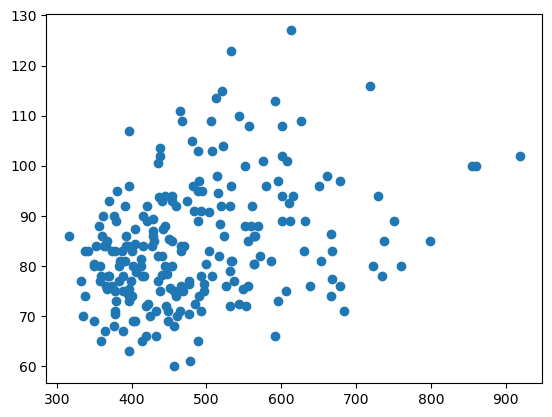

In [159]:
plt.scatter(data_num["TAP_I_8"], data_num["Waist_cm"])

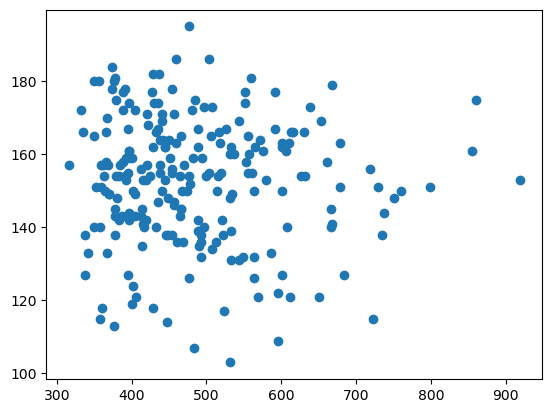

In [160]:
plt.scatter(data_num["TAP_I_8"], data_num["TeiQueSF_total"])

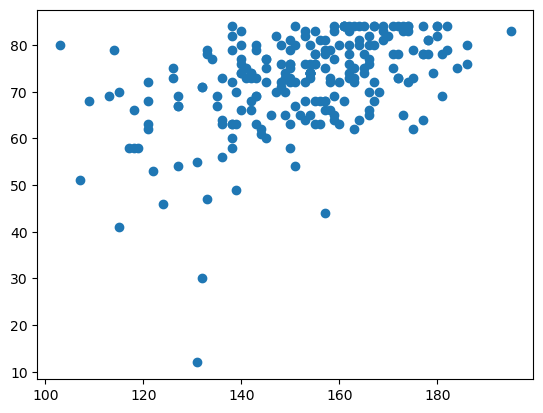

In [161]:
plt.scatter(data_num["TeiQueSF_total"], data_num["MSPSS_total"])

### Important Feature values in Clusters

In [162]:
pc1_top_features = list(relevant_features_pc1_sorted.index[:10])
data_bgm_clustered_on_pca.groupby('bgm_pca_cluster', as_index=False)[pc1_top_features + ['FEV_KK', 'FEV_STOER', 'FEV_HUNGER', 'BMI']].agg('median')

,bgm_pca_cluster,TAP_I_8,TAP_I_9,TAP_A_5,TMT_6,TAP_I_15,TAP_A_6,TAP_I_16,TAP_A_10,TAP_A_11,TAP_A_2,FEV_KK,FEV_STOER,FEV_HUNGER,BMI
0,0,532.5,516.0,231.0,1.0,500.0,226.0,498.5,231.0,227.0,222.5,2.0,5.0,3.5,25.534226
1,1,556.5,531.0,256.0,2.0,543.5,249.0,515.0,255.0,247.5,247.5,8.0,4.0,2.5,26.009541
2,2,416.0,406.5,210.5,1.0,405.0,206.5,395.0,207.0,206.0,207.5,4.0,5.0,5.0,22.703725
3,5,626.0,621.0,619.0,4.0,574.0,573.0,538.0,672.0,694.0,797.0,5.0,5.0,4.0,28.801077
4,7,569.0,547.0,250.0,3.0,523.0,247.0,514.0,255.0,243.0,254.0,8.0,3.0,3.0,25.303141


In [163]:
pc2_top_features = list(relevant_features_pc2_sorted.index[:10])
data_bgm_clustered_on_pca.groupby('bgm_pca_cluster', as_index=False)[pc2_top_features + ['FEV_KK', 'FEV_STOER', 'FEV_HUNGER', 'BMI']].agg('median')

,bgm_pca_cluster,TeiQueSF_total,TeiQueSF_well_being,FSoZu_SI,STAI_Trait_Anxiety,FSoZu_EU,TeiQueSF_sociability,MSPSS_total,NEOFFI_Extraversion,NEOFFI_Neuroticism,LOT_sumscore,FEV_KK,FEV_STOER,FEV_HUNGER,BMI
0,0,131.5,4.416667,3.285714,45.5,3.55,3.916667,54.5,1.833333,2.291667,22.5,2.0,5.0,3.5,25.534226
1,1,163.0,6.166667,4.571429,29.0,4.90,5.166667,76.0,2.583333,1.041667,30.5,8.0,4.0,2.5,26.009541
2,2,154.0,5.833333,4.285714,36.5,4.70,5.000000,74.0,2.416667,1.541667,27.0,4.0,5.0,5.0,22.703725
3,5,154.0,5.833333,4.285714,36.0,4.70,4.833333,74.0,2.416667,1.416667,27.0,5.0,5.0,4.0,28.801077
4,7,140.0,5.000000,4.000000,37.0,4.30,4.333333,69.0,2.166667,1.500000,26.0,8.0,3.0,3.0,25.303141


In [164]:
pc1_top_features_df = data_num_tr[pc1_top_features + ['FEV_KK', 'FEV_STOER', 'FEV_HUNGER']]
pc2_top_features_df = data_num_tr[pc2_top_features + ['FEV_KK', 'FEV_STOER', 'FEV_HUNGER']]

### Compare clusters using regression

In [165]:
from sklearn.linear_model import LogisticRegression
log_reg_pc1 = LogisticRegression()
log_reg_pc1.fit(pc1_top_features_df, bgm_cluster_on_pca)

LogisticRegression()

In [166]:
log_reg_pc1_coefficient_df = pd.DataFrame(log_reg_pc1.coef_, columns=pc1_top_features_df.columns)
abs(log_reg_pc1_coefficient_df).idxmax(axis=1)

0     TAP_A_2
1     TAP_A_5
2    TAP_A_10
3     TAP_A_2
4       TMT_6
dtype: object

In [167]:
log_reg_pc1_coefficient_df

,TAP_I_8,TAP_I_9,TAP_A_5,TMT_6,TAP_I_15,TAP_A_6,TAP_I_16,TAP_A_10,TAP_A_11,TAP_A_2,FEV_KK,FEV_STOER,FEV_HUNGER
0,0.165750,0.376273,0.012984,-0.301345,-0.470554,-0.049394,0.594917,0.068034,0.116386,-0.701375,-0.250699,0.254382,-0.001172
1,-0.383493,0.283848,0.524860,0.248589,0.465062,-0.444935,0.020424,0.496914,0.065417,-0.364117,0.190385,-0.180518,-0.108807
2,-0.461611,-0.584234,-0.459197,-0.798551,0.349709,-0.299609,-0.577066,-0.845791,-0.409966,0.463279,0.069799,0.163421,0.298595
3,0.004140,0.011367,0.330837,0.145427,-0.005472,0.311183,-0.023967,0.309665,0.351196,0.447618,-0.037736,0.060812,0.008985
4,0.675213,-0.087254,-0.409483,0.705880,-0.338746,0.482755,-0.014308,-0.028823,-0.123033,0.154595,0.028251,-0.298097,-0.197601


### TODO Remove multicollinear variables

In [168]:
# There's multicollinearity going on
np.corrcoef(np.array(pc1_top_features_df).T)

array([[ 1.        ,  0.9840613 ,  0.44617036,  0.61339723,  0.93737308,
         0.43851274,  0.90499816,  0.42170901,  0.38995629,  0.37550204,
         0.31353315, -0.14158837, -0.33540606],
       [ 0.9840613 ,  1.        ,  0.46282449,  0.61318317,  0.9226498 ,
         0.45521445,  0.89856951,  0.42273864,  0.39475242,  0.38062104,
         0.30868748, -0.12741021, -0.32422254],
       [ 0.44617036,  0.46282449,  1.        ,  0.4770083 ,  0.44298278,
         0.9890442 ,  0.44103921,  0.89308752,  0.89035288,  0.85691697,
         0.17475494, -0.1015045 , -0.13821951],
       [ 0.61339723,  0.61318317,  0.4770083 ,  1.        ,  0.55049631,
         0.46516765,  0.54491159,  0.43612422,  0.41580845,  0.3941503 ,
         0.22118193, -0.19703421, -0.2716489 ],
       [ 0.93737308,  0.9226498 ,  0.44298278,  0.55049631,  1.        ,
         0.4425511 ,  0.98472018,  0.41768639,  0.38950859,  0.37927749,
         0.30169828, -0.11649869, -0.31302879],
       [ 0.43851274,  0.455214

In [169]:
np.unique(bgm_cluster_on_pca)

array([0, 1, 2, 5, 7])

In [170]:
log_reg_pc2 = LogisticRegression()
log_reg_pc2.fit(pc2_top_features_df, bgm_cluster_on_pca)

LogisticRegression()

In [171]:
log_reg_pc2_coefficient_df = pd.DataFrame(log_reg_pc2.coef_, columns=pc2_top_features_df.columns)
abs(log_reg_pc2_coefficient_df).idxmax(axis=1)

0        TeiQueSF_total
1    STAI_Trait_Anxiety
2            FEV_HUNGER
3                FEV_KK
4    NEOFFI_Neuroticism
dtype: object

In [172]:
log_reg_pc2_coefficient_df

,TeiQueSF_total,TeiQueSF_well_being,FSoZu_SI,STAI_Trait_Anxiety,FSoZu_EU,TeiQueSF_sociability,MSPSS_total,NEOFFI_Extraversion,NEOFFI_Neuroticism,LOT_sumscore,FEV_KK,FEV_STOER,FEV_HUNGER
0,-0.995614,-0.128110,0.323424,0.378933,-0.590545,-0.121143,-0.539294,0.452033,0.600257,-0.156397,-0.209490,0.511196,-0.524726
1,0.911737,0.079018,0.201051,-1.011436,0.295816,-0.426542,0.066652,-0.414784,-0.121617,0.359049,0.373617,-0.138071,0.077088
2,0.120476,0.302937,-0.420849,0.382287,0.556232,0.575465,0.127748,0.040693,0.028602,-0.175690,-0.252171,-0.099981,0.601393
3,0.105158,0.137926,0.015692,0.059477,0.145890,0.056734,0.095214,0.023495,-0.067140,-0.088612,-0.218223,0.058998,0.019494
4,-0.141756,-0.391771,-0.119318,0.190738,-0.407393,-0.084514,0.249679,-0.101438,-0.440102,0.061650,0.306267,-0.332143,-0.173249


### ANOVA with some variables

In [173]:
BMI_clust_0 = np.array(data_bgm_clustered_on_pca[data_bgm_clustered_on_pca['bgm_pca_cluster'] == 0]['BMI'])
BMI_clust_1 = np.array(data_bgm_clustered_on_pca[data_bgm_clustered_on_pca['bgm_pca_cluster'] == 1]['BMI'])
BMI_clust_2 = np.array(data_bgm_clustered_on_pca[data_bgm_clustered_on_pca['bgm_pca_cluster'] == 2]['BMI'])
BMI_clust_7= np.array(data_bgm_clustered_on_pca[data_bgm_clustered_on_pca['bgm_pca_cluster'] == 7]['BMI'])

from scipy.stats import f_oneway
f_oneway(BMI_clust_0, BMI_clust_1,
         BMI_clust_2, BMI_clust_7)

F_onewayResult(statistic=17.827113021659756, pvalue=2.084042584594154e-10)

In [174]:
from scipy.stats import tukey_hsd
bmi_hsd = tukey_hsd(BMI_clust_0, BMI_clust_1,
                    BMI_clust_2, BMI_clust_7)
pd.DataFrame(bmi_hsd.pvalue, columns=[0, 1, 2, 7], index=[0, 1, 2, 7])

,0,1,2,7
0,1.000000,2.586719e-01,4.456063e-01,0.721347
1,0.258672,1.000000e+00,1.409568e-09,0.678539
2,0.445606,1.409568e-09,1.000000e+00,0.000109
7,0.721347,6.785394e-01,1.087274e-04,1.000000


## Variables of no interest in clusters

#### Age

In [175]:
lemon_age = pd.read_csv("additional_raw_data/LEMON_age.csv",index_col=0)
lemon_age

,20-25,25-30,30-35,35-40,55-60,60-65,65-70,70-75,75-80
cluster_0,1,2,3,0,0,2,2,0,0
cluster_1,3,5,0,0,0,2,2,0,0
cluster_2,73,51,10,1,0,1,1,3,0
cluster_5,0,0,0,0,0,0,0,1,0
cluster_7,2,3,0,0,1,8,5,10,2


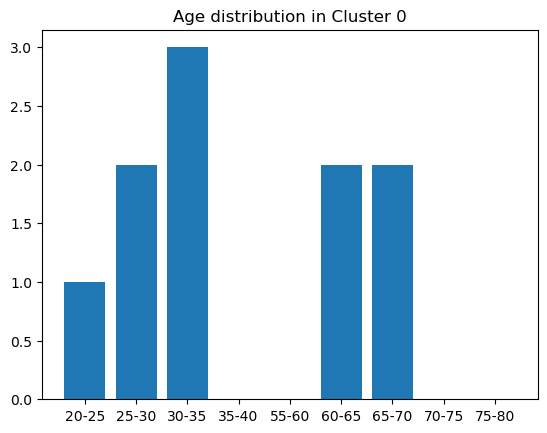

In [176]:
plt.bar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9],
        height=lemon_age.iloc[0,:])
plt.title("Age distribution in Cluster 0")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=list(lemon_age.columns))
plt.show()

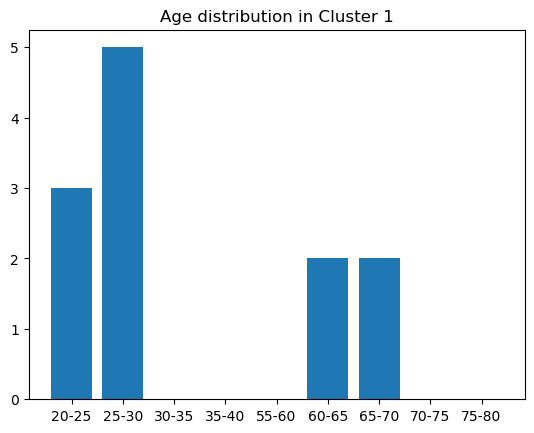

In [177]:
plt.bar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9],
        height=lemon_age.iloc[1,:])
plt.title("Age distribution in Cluster 1")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=list(lemon_age.columns))
plt.show()

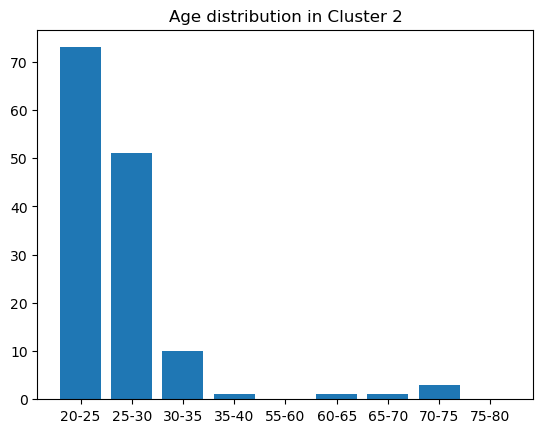

In [178]:
plt.bar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9],
        height=lemon_age.iloc[2,:])
plt.title("Age distribution in Cluster 2")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=list(lemon_age.columns))
plt.show()

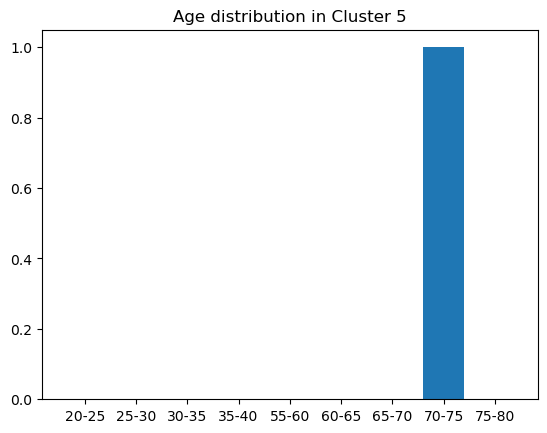

In [179]:
plt.bar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9],
        height=lemon_age.iloc[3,:])
plt.title("Age distribution in Cluster 5")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=list(lemon_age.columns))
plt.show()

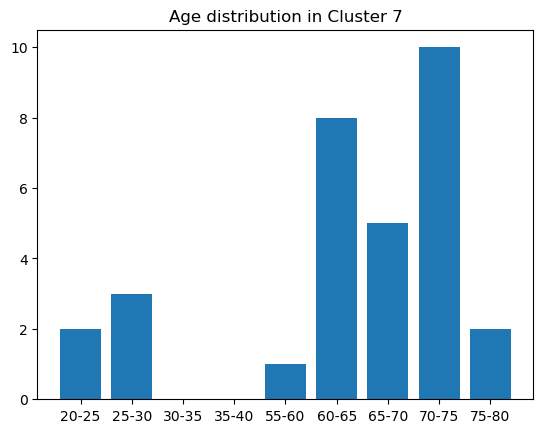

In [180]:
plt.bar(x=[1, 2, 3, 4, 5, 6, 7, 8, 9],
        height=lemon_age.iloc[4,:])
plt.title("Age distribution in Cluster 7")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=list(lemon_age.columns))
plt.show()

#### Sex

In [181]:
lemon_sex = pd.read_csv("additional_raw_data/LEMON_sex.csv",index_col=0)
lemon_sex

,Female,Male
cluster_0,6,4
cluster_1,21,25
cluster_2,43,97
cluster_5,0,1
cluster_7,12,19


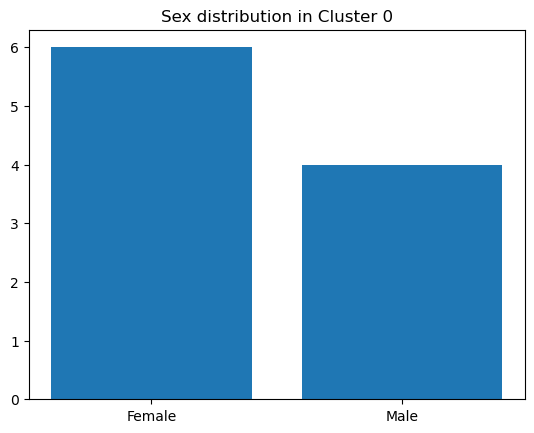

In [182]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[0,:])
plt.title("Sex distribution in Cluster 0")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_sex.columns))
plt.show()

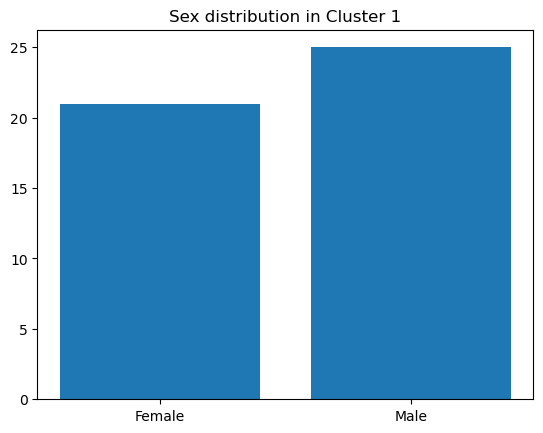

In [183]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[1,:])
plt.title("Sex distribution in Cluster 1")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_sex.columns))
plt.show()

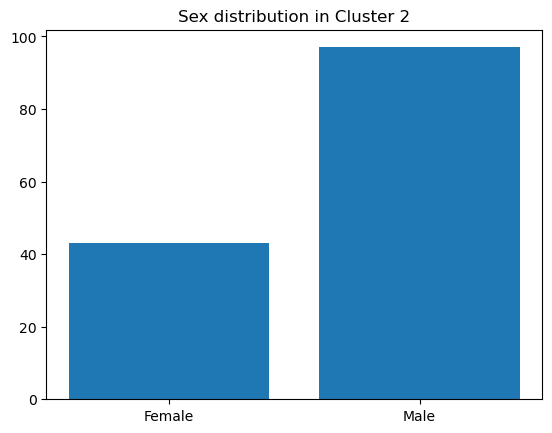

In [184]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[2,:])
plt.title("Sex distribution in Cluster 2")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_sex.columns))
plt.show()

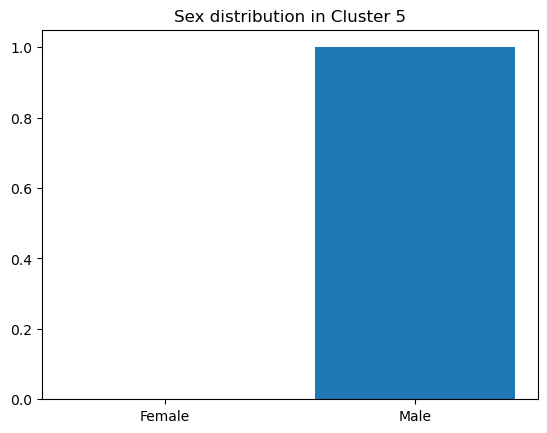

In [185]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[3,:])
plt.title("Sex distribution in Cluster 5")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_sex.columns))
plt.show()

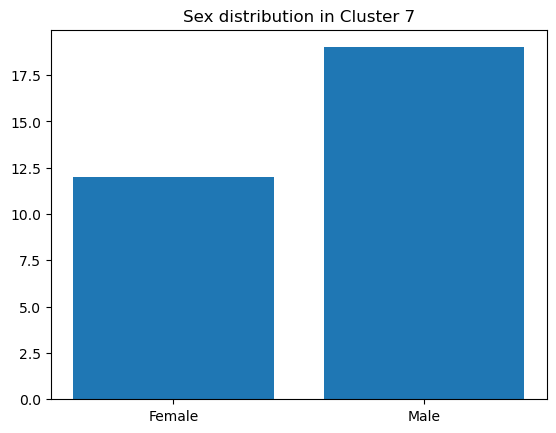

In [186]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[4,:])
plt.title("Sex distribution in Cluster 7")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_sex.columns))
plt.show()

#### Handedness

In [187]:
lemon_handedness = pd.read_csv("additional_raw_data/LEMON_handedness.csv",index_col=0)
lemon_handedness

,Right,Left
cluster_0,9,1
cluster_1,40,5
cluster_2,124,15
cluster_5,1,0
cluster_7,30,0


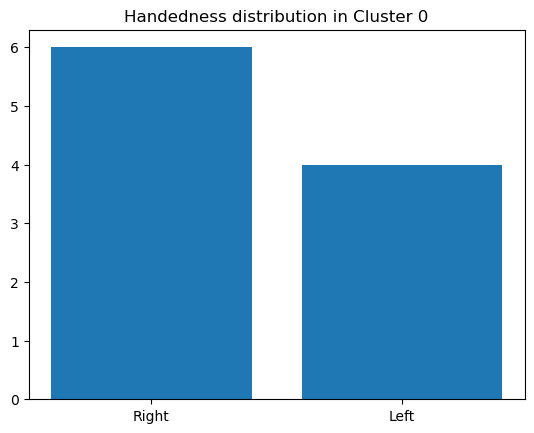

In [188]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[0,:])
plt.title("Handedness distribution in Cluster 0")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_handedness.columns))
plt.show()

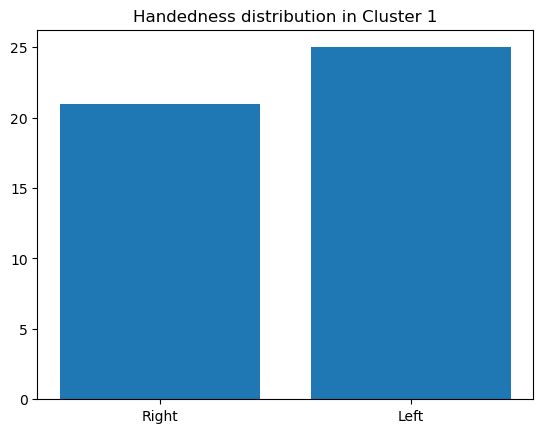

In [189]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[1,:])
plt.title("Handedness distribution in Cluster 1")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_handedness.columns))
plt.show()

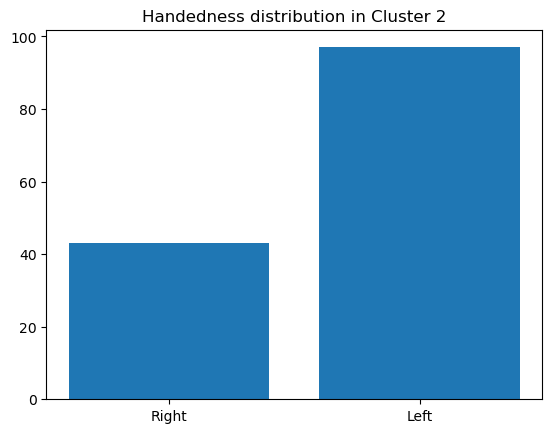

In [190]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[2,:])
plt.title("Handedness distribution in Cluster 2")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_handedness.columns))
plt.show()

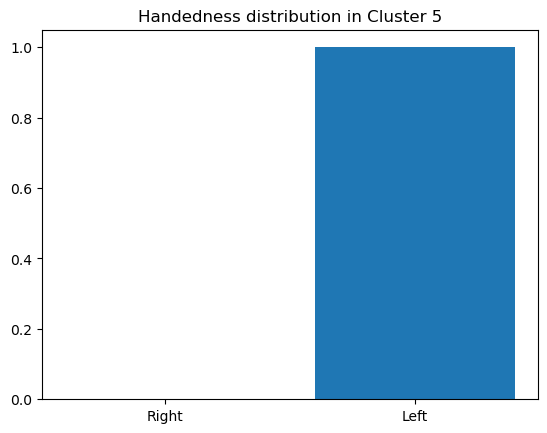

In [191]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[3,:])
plt.title("Handedness distribution in Cluster 5")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_handedness.columns))
plt.show()

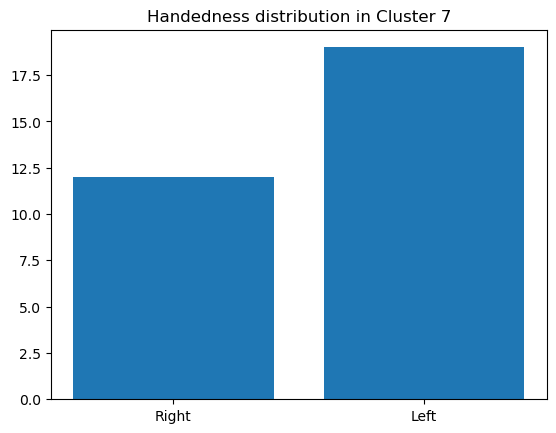

In [192]:
plt.bar(x=[1, 2],
        height=lemon_sex.iloc[4,:])
plt.title("Handedness distribution in Cluster 7")
plt.xticks(ticks=[1, 2],
           labels=list(lemon_handedness.columns))
plt.show()

## Clustering PCA no BMI/waist cm

In [217]:
from sklearn.mixture import BayesianGaussianMixture
n_components = 10

bgm_on_pca_nobmi = BayesianGaussianMixture(n_components=n_components,
                                           n_init=20,
                                           covariance_type="full",
                                           weight_concentration_prior=10000,
                                           init_params="k-means++",
                                           random_state=44)

In [224]:
bgm_on_pca_nobmi.fit(components_nobmi)
cluster_list = list(zip(range(n_components), bgm_on_pca_nobmi.weights_))

In [225]:
# Clusters and centroid coordinates
list(zip(cluster_list, bgm_on_pca_nobmi.means_))

[((0, 0.48626943901784137), array([-2.90266833, -1.27936857])),
 ((1, 0.2519136198352919), array([ 4.36780492, -1.50741463])),
 ((2, 0.004515869217899576), array([0.00327742, 0.00014891])),
 ((3, 0.08339088544060226), array([-2.25032959,  5.29481947])),
 ((4, 0.0045148867497862705), array([0.00327656, 0.00014888])),
 ((5, 0.004521739983183427), array([0.00337058, 0.00014478])),
 ((6, 0.004513903589680065), array([0.00327569, 0.00014884])),
 ((7, 0.01022157407436851), array([8.54031354, 4.5898971 ])),
 ((8, 0.14562565460163476), array([2.82241083, 3.52178378])),
 ((9, 0.004512427489711912), array([0.0032744 , 0.00014878]))]

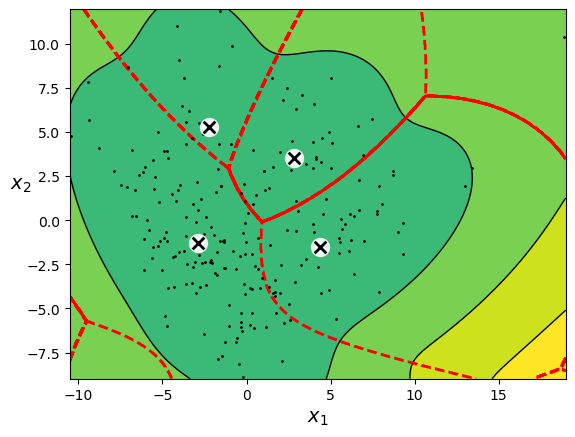

In [210]:
fig = plot_gaussian_mixture(bgm_on_pca_nobmi, components_nobmi)
# Clusters shown on plot are (clockwise): 0, 3, 8, 1 
fig

#### Dump models and save data for experiments with plotting style

In [211]:
%cd /Users/artemii/Documents/o-brain-lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts/


pkl.dump(bgm_on_pca_nobmi, open('processed_data/bgm_on_pca_nobmi.mdl', 'wb'))

/Users/artemii/Documents/o-brain-lab/projects/obesity-types/grant-proposals/sigrid-juselius-2022/scripts


In [212]:
np.save('processed_data/components_nobmi.npy', components_nobmi)

In [213]:
data_num.to_csv('processed_data/behavioural_numerical_data.csv')